In [1]:
import pandas as pd 
df=pd.read_csv("E:/PYTHON/CLUSTERING/wine-clustering (1).csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df.shape

(178, 13)

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("E:/PYTHON/UNSUPERVISED/wine-clustering (1).csv")

df_new = pd.concat([df] * 6, ignore_index=True)   # 178*6 ≈ 1068 rows

df_new = df_new.head(1000)

# Add small random noise to numeric columns (to avoid duplicates)
for col in df_new.select_dtypes(include=[np.number]).columns:
    df_new[col] = df_new[col] + np.random.normal(0, 0.01, size=len(df_new))

# Round numeric columns to 2 decimal places
df_new[df_new.select_dtypes(include=[np.number]).columns] = df_new.select_dtypes(include=[np.number]).round(2)

# Save new dataset
df_new.to_csv("new_updated_wine-clustering-1000.csv", index=False)

print("New dataset shape:", df_new.shape)

New dataset shape: (1000, 13)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,13.012800,2.282430,2.363290,19.353490,99.925090,2.323260,2.081620,0.35710,1.609140,4.990830,0.97066,2.65004,758.617790
std,0.813365,1.088931,0.275575,3.335228,14.412813,0.622174,0.982137,0.12297,0.568208,2.252404,0.22408,0.69624,319.300739
min,11.020000,0.720000,1.350000,10.580000,69.980000,0.960000,0.330000,0.11000,0.400000,1.270000,0.45000,1.26000,277.990000
25%,12.350000,1.587500,2.210000,17.000000,88.010000,1.790000,1.267500,0.27000,1.250000,3.205000,0.81000,2.05000,501.997500
50%,13.050000,1.810000,2.360000,19.010000,98.000000,2.410000,2.195000,0.33000,1.570000,4.610000,1.00000,2.81500,679.980000
75%,13.690000,2.972500,2.560000,21.500000,107.990000,2.820000,2.900000,0.44000,1.960000,6.120000,1.12000,3.19000,1020.000000
max,14.840000,5.800000,3.240000,30.020000,162.020000,3.890000,5.090000,0.66000,3.600000,13.010000,1.71000,4.01000,1680.000000


In [7]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
import pandas as pd

# Only numeric columns
numeric_cols = df.select_dtypes(include=['float64','int64'])

# Calculate skewness
skewness = numeric_cols.skew().sort_values(ascending=False)
print(skewness)

Malic_Acid              1.112626
Magnesium               1.092139
Color_Intensity         0.893446
Proline                 0.696095
Nonflavanoid_Phenols    0.495794
Proanthocyanins         0.460839
Ash_Alcanity            0.245670
Total_Phenols           0.040485
Flavanoids             -0.052232
Alcohol                -0.052476
Hue                    -0.069460
Ash                    -0.200078
OD280                  -0.378449
dtype: float64


In [11]:
import pandas as pd
import numpy as np


# Columns that need log transformation
skewed_cols = ["Magnesium", "Malic_Acid", "Color_Intensity", "Proline", "Proanthocyanins"]

# Apply log(1+x) transform (1 is added to avoid log(0))
df[skewed_cols] = np.log1p(df[skewed_cols])

In [12]:
import pandas as pd

# Only numeric columns
numeric_cols = df.select_dtypes(include=['float64','int64'])

# Calculate skewness
skewness = numeric_cols.skew().sort_values(ascending=False)
print(skewness)

Magnesium               0.597946
Malic_Acid              0.594093
Nonflavanoid_Phenols    0.495794
Ash_Alcanity            0.245670
Color_Intensity         0.113946
Total_Phenols           0.040485
Proline                 0.038066
Flavanoids             -0.052232
Alcohol                -0.052476
Hue                    -0.069460
Ash                    -0.200078
Proanthocyanins        -0.232345
OD280                  -0.378449
dtype: float64


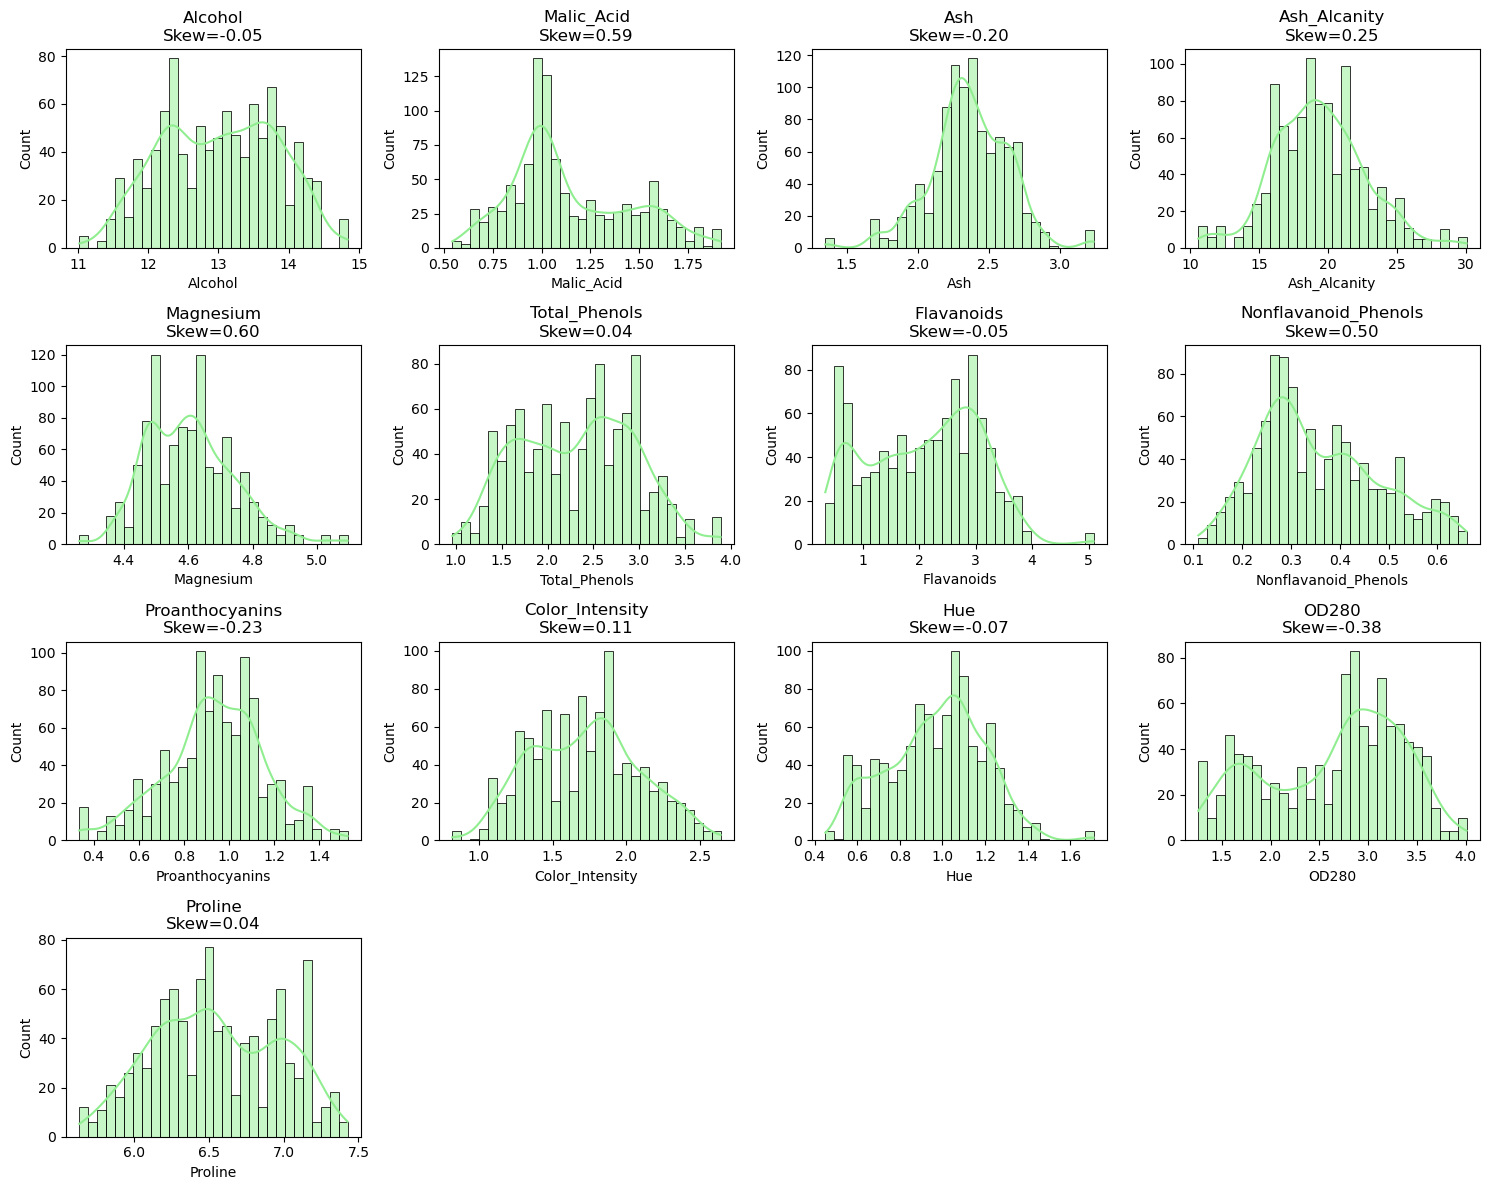

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Get numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms with KDE
plt.figure(figsize=(15, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)  # 4x4 grid for 13 columns
    sns.histplot(df[col], kde=True, bins=30, color="lightgreen")
    plt.title(f"{col}\nSkew={df[col].skew():.2f}")

plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv("E:/PYTHON/UNSUPERVISED/new_updated_wine-clustering-1000.csv")

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numeric data
scaled_data = scaler.fit_transform(df[numeric_cols])

# Convert back to DataFrame (keep column names)
df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)

# Save scaled data to a new CSV
df_scaled.to_csv("new_wine_scaled.csv", index=False)





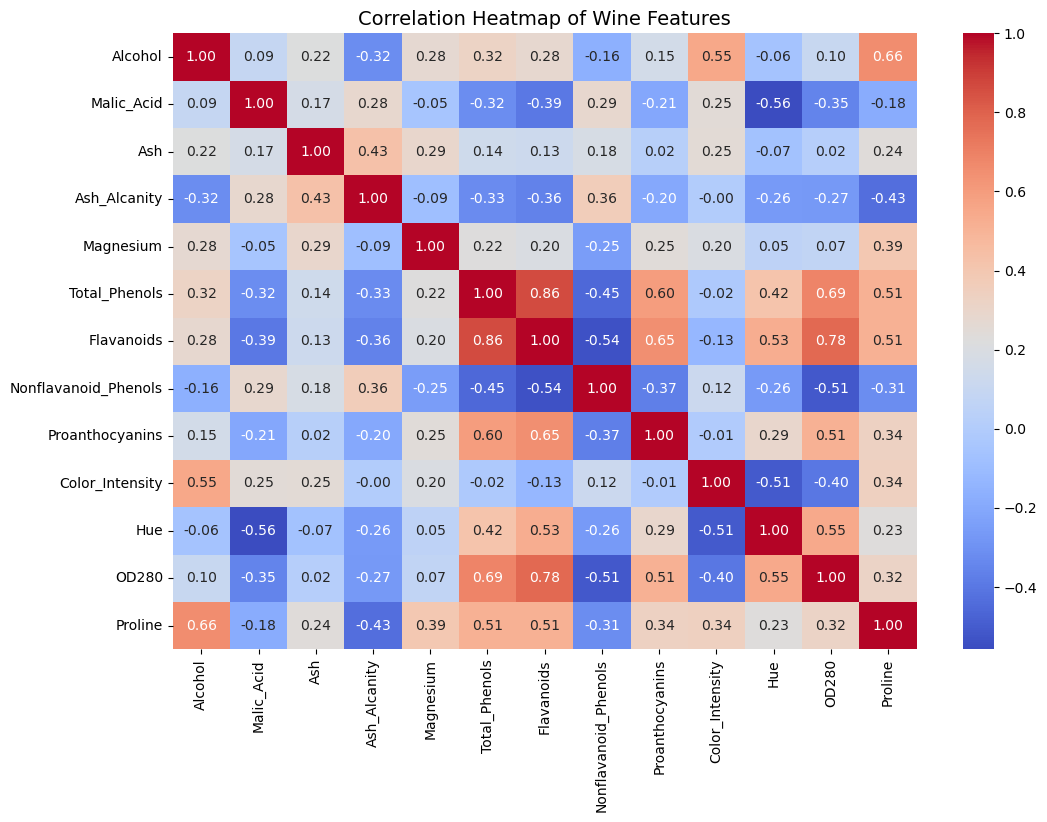

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Wine Features", fontsize=14)
plt.show()


c:\Users\yuvas\.anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\yuvas\.anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\yuvas\.anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\yuvas\.anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

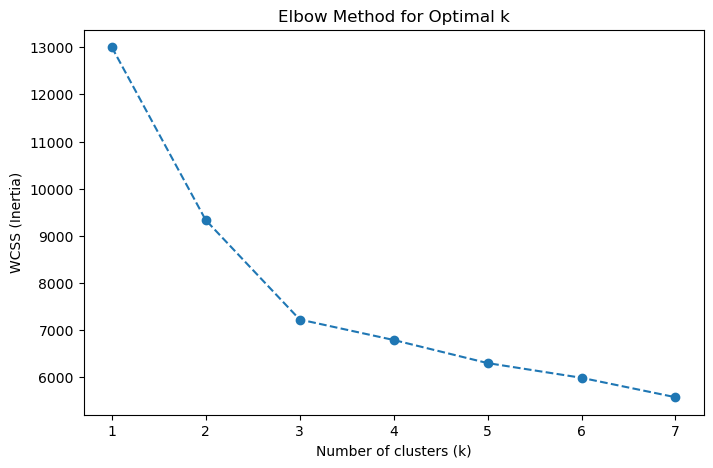

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []


for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(range(1, 8), wcss, marker="o", linestyle="--")
plt.xticks(range(1, 8))
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil_scores = {}

for k in range(2, 8):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    sil_scores[k] = score

for k, score in sil_scores.items():
    print(f"k = {k}, Silhouette Score = {score:.3f}")


c:\Users\yuvas\.anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\yuvas\.anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\yuvas\.anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\yuvas\.anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

k = 2, Silhouette Score = 0.265
k = 3, Silhouette Score = 0.292
k = 4, Silhouette Score = 0.245
k = 5, Silhouette Score = 0.182
k = 6, Silhouette Score = 0.181
k = 7, Silhouette Score = 0.152


c:\Users\yuvas\.anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

kmeans = KMeans(n_clusters=3, random_state=42)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
dbscan = DBSCAN(eps=3.0, min_samples=5)


labels = {
    "KMeans": kmeans.fit_predict(scaled_data),
    "Hierarchical": hc.fit_predict(scaled_data),
    "DBSCAN": dbscan.fit_predict(scaled_data)
}

pca = PCA(n_components=2)
data_2d = pca.fit_transform(scaled_data)


c:\Users\yuvas\.anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


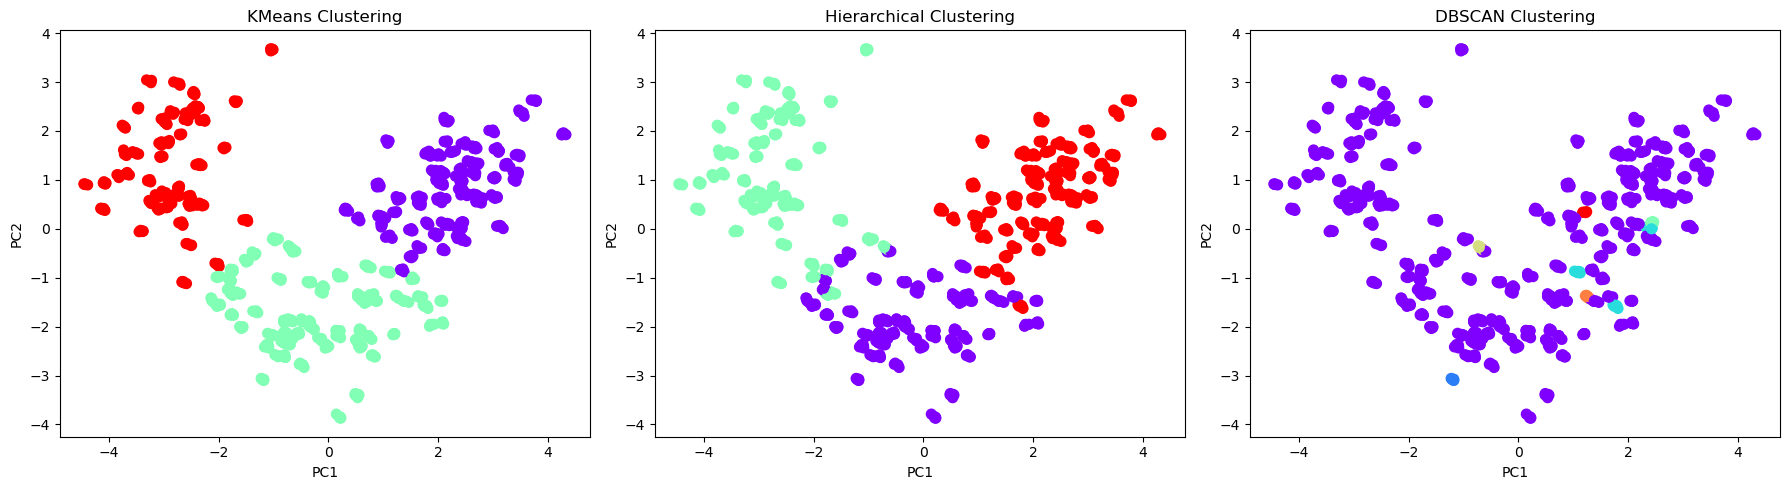

In [18]:
plt.figure(figsize=(18,5))

for i, (name, cluster_labels) in enumerate(labels.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(data_2d[:,0], data_2d[:,1], c=cluster_labels, cmap="rainbow", s=50)
    plt.title(f"{name} Clustering")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

plt.tight_layout()
plt.show()


In [ ]:
for name, cluster_labels in labels.items():
    counts = pd.Series(cluster_labels).value_counts().sort_index()


    counts.index = counts.index + 1  
    
    print(f"\n{name} Cluster Distribution:")
    print(counts)



KMeans Cluster Distribution:
1    371
2    372
3    257
Name: count, dtype: int64

Hierarchical Cluster Distribution:
1    319
2    292
3    389
Name: count, dtype: int64

DBSCAN Cluster Distribution:
1    954
2      6
3     18
4      6
5      6
6      5
7      5
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pandas as pd 

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_sil = silhouette_score(scaled_data, kmeans_labels)


hc = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
hc_labels = hc.fit_predict(scaled_data)
hc_sil = silhouette_score(scaled_data, hc_labels)
hc_ari = adjusted_rand_score(kmeans_labels, hc_labels)

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
dbscan_sil = silhouette_score(scaled_data, dbscan_labels)
dbscan_ari = adjusted_rand_score(kmeans_labels, dbscan_labels)


results = pd.DataFrame({
    "Method": ["KMeans (k=3)", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [round(kmeans_sil,3), round(hc_sil,3), round(dbscan_sil,3)],
    "ARI vs KMeans": [1.0, round(hc_ari,3), round(dbscan_ari,3)]
})

print(results)


         Method  Silhouette Score  ARI vs KMeans
0  KMeans (k=3)             0.292          1.000
1  Hierarchical             0.282          0.852
2        DBSCAN             0.739          0.041


c:\Users\yuvas\.anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
